## Problem Statement

This hackathon will try to address the challenges of banking telecallers when they call blindly to people in order to sell term deposit plans. 
The aim of this hackathon is to find the most accurate prediction of whether a person to be called will subscribe to the term deposit plan or not using any of the machine learning algorithms.
The participants can use the historical data that consists of different features of customers and whether they subscribed to the plan or not. 
Using this data, the participants need to build a machine learning model in order to make predictions.<br>


* Term/Lock-in-periods
* Rate of Interest
* Credit Rating of the Deposit...
* Credit Rating>No Lock In Period

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

plt.rcParams['figure.figsize']=[15,10]



In [2]:
train = pd.read_csv('train.csv')
train.head()

age          job   marital  education default  balance housing loan  \
0   51       admin.   married   tertiary      no      148      no   no   
1   55  blue-collar   married  secondary      no     7160     yes   no   
2   65  blue-collar  divorced   tertiary      no     2197     yes   no   
3   25       admin.   married  secondary      no     6658     yes   no   
4   36     services   married  secondary      no     1761     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y_bool  
0  cellular   15   apr       263         2     -1         0  unknown       0  
1   unknown    4   may       315         1     -1         0  unknown       0  
2  cellular   12   may       102         2     -1         0  unknown       0  
3  cellular   16   feb       197         1     -1         0  unknown       1  
4  cellular   19   sep       177         1     -1         0  success       0

In [3]:
test = pd.read_csv('test.csv')
test.head()

age          job   marital  education default  balance housing loan  \
0   36   technician  divorced  secondary      no     1842     yes  yes   
1   26   management   married    primary      no      165      no   no   
2   50   management   married    unknown      no     5006     yes   no   
3   56   management   married  secondary      no     5122      no   no   
4   26  blue-collar   married   tertiary      no      151      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome  
0  cellular    5   aug       149         1     -1         0  unknown  
1  cellular    7   nov        44         2     -1         0  unknown  
2  cellular    7   may       664         2     -1         0    other  
3  cellular    9   aug        53         2     -1         0  unknown  
4   unknown    1   jul        67         5    130         0  unknown

<AxesSubplot:>

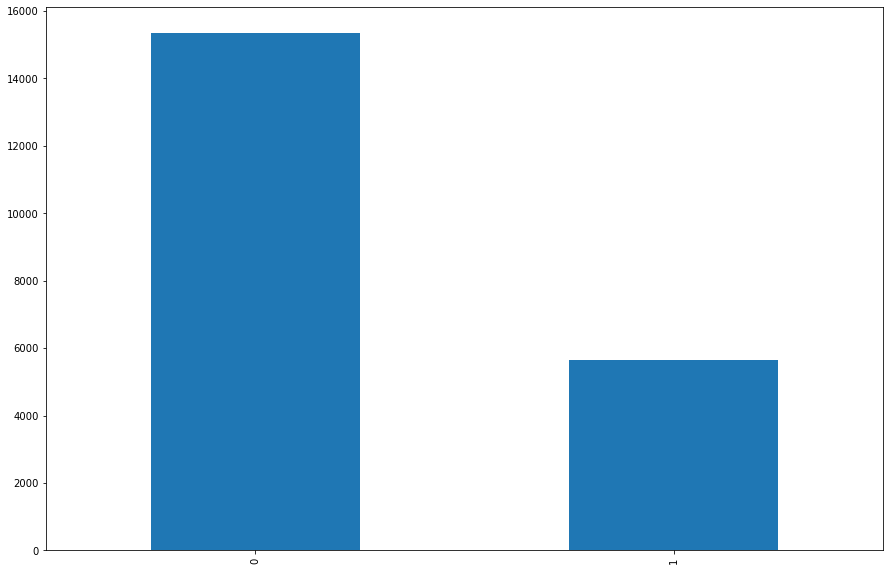

In [4]:
# target variable

train.y_bool.value_counts().plot(kind='bar')

In [5]:
# Combine the data
combined = pd.concat([train,test],ignore_index=True)

In [6]:
combined.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y_bool'],
      dtype='object')

In [7]:
combined.job.unique()

array(['admin.', 'blue-collar', 'services', 'self-employed', 'technician',
       'management', 'unknown', 'unemployed', 'retired', 'housemaid',
       'entrepreneur', 'student'], dtype=object)

In [8]:
# Lets bin the profession....


def prof(x):
    if x in ['unknown', 'unemployed', 'retired','student']:
        return('Unemployed')
    elif x in ['admin.','entrepreneur','self-employed','management']:
        return('Employed')
    elif x in ['blue-collar', 'housemaid','services', 'technician']:
        return('blue_collar')
    else:
        return(x)

In [9]:
combined['Profession'] = combined.job.apply(prof)

In [10]:
combined.Profession.unique()

array(['Employed', 'blue_collar', 'Unemployed'], dtype=object)

In [11]:
tb1 =pd.crosstab(combined.Profession,combined.y_bool)

import scipy.stats as stats

teststats,pvalue,df,exp_freq=stats.chi2_contingency(tb1)
print(pvalue)

0.8881338829532087


<AxesSubplot:xlabel='Profession'>

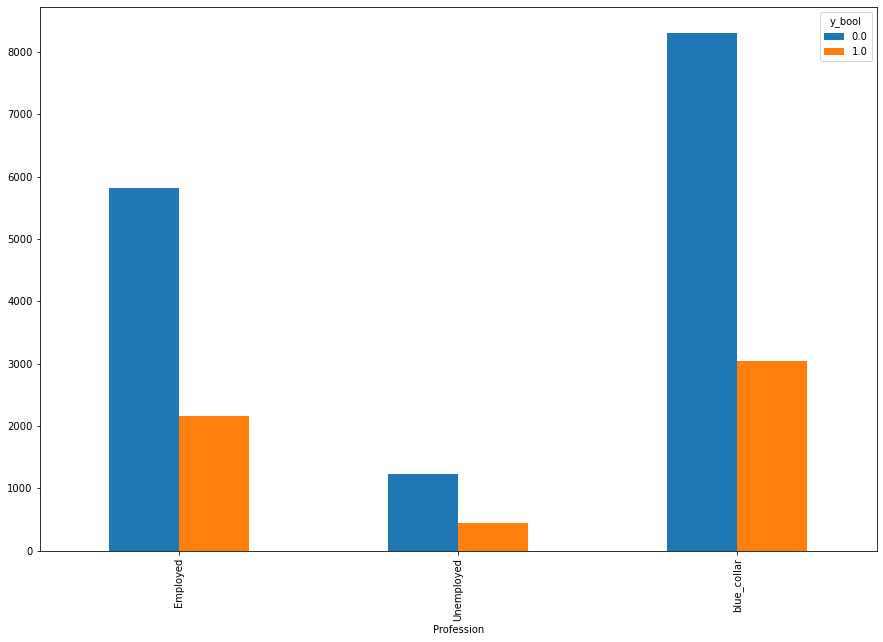

In [12]:
tb1.plot(kind='bar')

In [13]:
combined.head()

age          job   marital  education default  balance housing loan  \
0   51       admin.   married   tertiary      no      148      no   no   
1   55  blue-collar   married  secondary      no     7160     yes   no   
2   65  blue-collar  divorced   tertiary      no     2197     yes   no   
3   25       admin.   married  secondary      no     6658     yes   no   
4   36     services   married  secondary      no     1761     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y_bool  \
0  cellular   15   apr       263         2     -1         0  unknown     0.0   
1   unknown    4   may       315         1     -1         0  unknown     0.0   
2  cellular   12   may       102         2     -1         0  unknown     0.0   
3  cellular   16   feb       197         1     -1         0  unknown     1.0   
4  cellular   19   sep       177         1     -1         0  success     0.0   

    Profession  
0     Employed  
1  blue_collar  
2  blue_collar  
3     Employed  
4  blue_collar

In [14]:
combined.education.unique()

array(['tertiary', 'secondary', 'primary', 'unknown'], dtype=object)

In [15]:
cat_cols=combined.select_dtypes(include=object).columns

In [16]:
for i in cat_cols:
    if len(combined.loc[:,i].unique())<=3:
        print(i)

marital
default
housing
loan
contact
Profession


In [17]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Profession'],
      dtype='object')

In [18]:
combined.loc[combined.education=='unknown','Profession'].value_counts()

blue_collar    861
Employed       628
Unemployed     126
Name: Profession, dtype: int64

In [19]:
combined.poutcome.unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

In [20]:
pd.DataFrame(combined.groupby('poutcome')['y_bool'].value_counts(normalize=True)).T

poutcome   failure               other             success            \
y_bool         0.0       1.0       0.0       1.0       0.0       1.0   
y_bool    0.742012  0.257988  0.732836  0.267164  0.689922  0.310078   

poutcome   unknown            
y_bool         0.0       1.0  
y_bool    0.729178  0.270822

In [21]:
# No employed ~ Blue Collar and rest ~Same Education

In [22]:
# Apply Chi Square Test to verify the Importance Cat Variable

feats=[]

for i in cat_cols:
    tb1 = pd.crosstab(combined.loc[:,i],combined.y_bool)
    teststats,pvalue,df,exp_freq = stats.chi2_contingency(tb1)
    if pvalue<0.05:
        feats.append(i)
print(feats)        

['job']


In [23]:
#list of numerical var

num_cols=combined.select_dtypes(include=np.number).columns

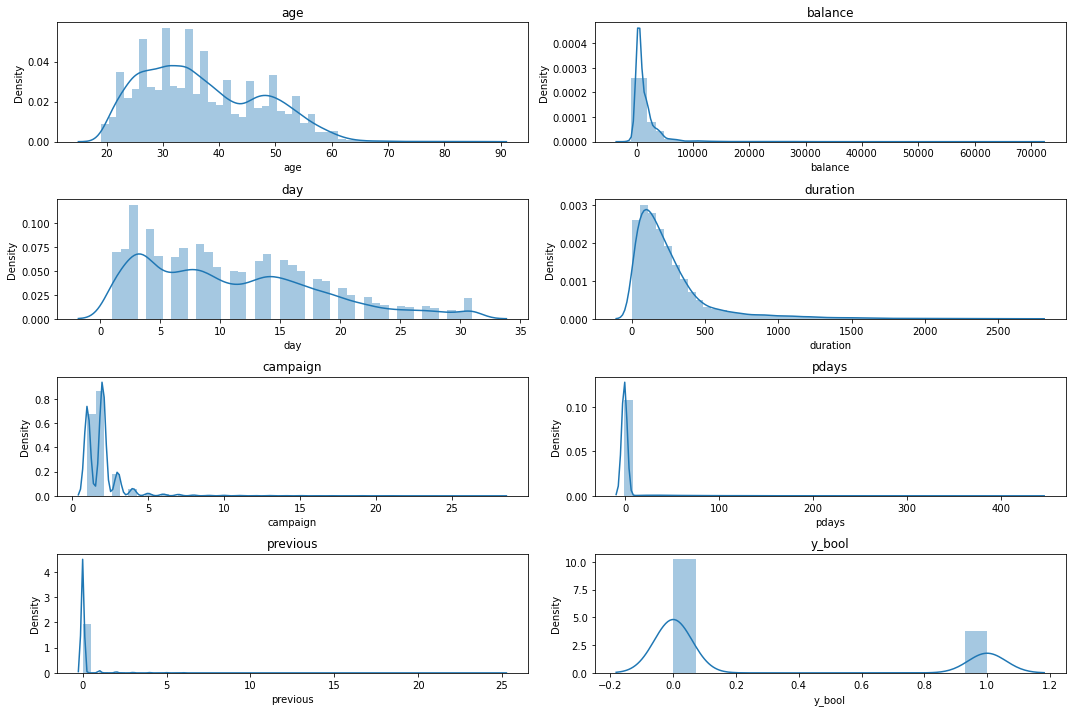

In [24]:
nrows=4
ncols=2
iterator=1

for i in num_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(combined.loc[:,i])
    plt.title(i)
    iterator +=1
plt.tight_layout()
plt.show()

In [25]:
from sklearn.preprocessing import KBinsDiscretizer

kbins = KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='uniform')

combined['age_bins']=kbins.fit_transform(combined[['age']])

In [26]:
tb1 = pd.crosstab(combined.age_bins,combined.y_bool)
teststats,pvalue,df,exp_freq = stats.chi2_contingency(tb1)
print(pvalue)

7.913095873130406e-10


In [27]:
kbins.bin_edges_

array([array([19., 36., 53., 70., 87.])], dtype=object)

In [28]:
def bins(x):
    if (x<=19):
        return('Teens')
    elif (x<=36):
        return('Adults')
    elif (x<=53):
        return('Mature')
    else:
        return('Senior')

In [29]:
# Apply 
combined['age_cat'] = combined.age.apply(bins)

In [30]:
tb1 = pd.crosstab(combined.age_cat,combined.y_bool)
teststats,pvalue,df,exp_freq = stats.chi2_contingency(tb1)
print(pvalue)

3.1639967525897536e-11


In [31]:
combined.head()

age          job   marital  education default  balance housing loan  \
0   51       admin.   married   tertiary      no      148      no   no   
1   55  blue-collar   married  secondary      no     7160     yes   no   
2   65  blue-collar  divorced   tertiary      no     2197     yes   no   
3   25       admin.   married  secondary      no     6658     yes   no   
4   36     services   married  secondary      no     1761     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y_bool  \
0  cellular   15   apr       263         2     -1         0  unknown     0.0   
1   unknown    4   may       315         1     -1         0  unknown     0.0   
2  cellular   12   may       102         2     -1         0  unknown     0.0   
3  cellular   16   feb       197         1     -1         0  unknown     1.0   
4  cellular   19   sep       177         1     -1         0  success     0.0   

    Profession  age_bins age_cat  
0     Employed       1.0  Mature  
1  blue_collar       2.0  Senior  
2  blue_collar       2.0  Senior  
3     Employed       0.0  Adults  
4  blue_collar       1.0  Adults

In [32]:
combined.balance.describe()

count    30000.000000
mean      1608.013900
std       2989.866596
min      -2477.000000
25%        303.000000
50%        634.000000
75%       1880.000000
max      71188.000000
Name: balance, dtype: float64

In [33]:
# Make n-bins=5

kbins = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')
kbins.fit_transform(combined[['balance']])

array([[0.],
       [4.],
       [3.],
       ...,
       [1.],
       [0.],
       [3.]])

In [34]:
# convert -2477 to 0
def balanced(x):
    if x<0:
        return(0)
    else:
        return(x)

In [35]:
combined['balance'] = combined.balance.apply(balanced)
combined.balance.describe()

count    30000.000000
mean      1626.014067
std       2978.325577
min          0.000000
25%        303.000000
50%        634.000000
75%       1880.000000
max      71188.000000
Name: balance, dtype: float64

In [36]:
# Make n-bins=5

kbins = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')
combined['balance_bins']=kbins.fit_transform(combined[['balance']])

In [37]:
kbins.bin_edges_

array([array([    0. ,   236. ,   492. ,  1078.4,  2199. , 71188. ])],
      dtype=object)

In [38]:
tb1 = pd.crosstab(combined.balance_bins,combined.y_bool)
teststats,pvalue,df,exp_freq = stats.chi2_contingency(tb1)
print(pvalue)

0.0008745599667551404


In [39]:
# Duration

In [40]:
combined.duration.describe()

count    30000.000000
mean       262.788833
std        285.880993
min          4.000000
25%         94.000000
50%        183.000000
75%        318.000000
max       2703.000000
Name: duration, dtype: float64

In [41]:
# convert the duration in mins
combined['duration']=combined.duration/60

In [42]:
combined.duration.describe()

count    30000.000000
mean         4.379814
std          4.764683
min          0.066667
25%          1.566667
50%          3.050000
75%          5.300000
max         45.050000
Name: duration, dtype: float64

In [43]:
# If the Call Duration is more than 5 mins,y_bool count will be high

combined.loc[combined.duration<=5,'y_bool'].value_counts(normalize=True)

0.0    0.727913
1.0    0.272087
Name: y_bool, dtype: float64

In [44]:
# Make n-bins=5

kbins = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='uniform')
combined['duration_bins']=kbins.fit_transform(combined[['balance']])

In [45]:
# Drop the variables

newdata=combined.drop(['contact','job','duration_bins'],axis=1)

In [46]:
newdata.head()

age   marital  education default  balance housing loan  day month  \
0   51   married   tertiary      no      148      no   no   15   apr   
1   55   married  secondary      no     7160     yes   no    4   may   
2   65  divorced   tertiary      no     2197     yes   no   12   may   
3   25   married  secondary      no     6658     yes   no   16   feb   
4   36   married  secondary      no     1761     yes   no   19   sep   

   duration  campaign  pdays  previous poutcome  y_bool   Profession  \
0  4.383333         2     -1         0  unknown     0.0     Employed   
1  5.250000         1     -1         0  unknown     0.0  blue_collar   
2  1.700000         2     -1         0  unknown     0.0  blue_collar   
3  3.283333         1     -1         0  unknown     1.0     Employed   
4  2.950000         1     -1         0  success     0.0  blue_collar   

   age_bins age_cat  balance_bins  
0       1.0  Mature           0.0  
1       2.0  Senior           4.0  
2       2.0  Senior           3.0  
3       0.0  Adults           4.0  
4       1.0  Adults           3.0

In [47]:
# convert target variable from float to int - after spliting the data

In [48]:
# Make n-bins=5

kbins = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')
combined['day_bins']=kbins.fit_transform(combined[['day']])

In [49]:
tb1 = pd.crosstab(combined.day_bins,combined.y_bool)
teststats,pvalue,df,exp_freq = stats.chi2_contingency(tb1)
print(pvalue)

0.540540988585851


<AxesSubplot:xlabel='y_bool,month'>

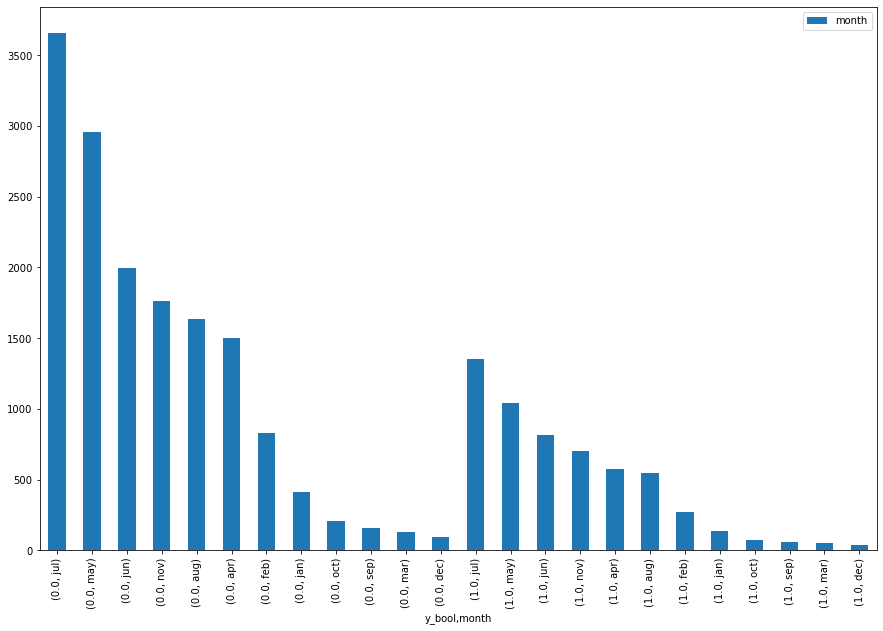

In [50]:
# Day vs Target

pd.DataFrame(newdata.groupby('y_bool')['month'].value_counts()).plot(kind='bar')

In [51]:
def months(x):
    if x in ['oct','nov','dec']:
        return('q4')
    elif x in ['apr','may','jun']:
        return('q2')
    elif x in ['jan','feb','mar']:
        return('q1')
    else:
        return('q3')
    

In [52]:
newdata['month_cat'] = newdata.month.apply(months)

In [53]:
newdata.head()

age   marital  education default  balance housing loan  day month  \
0   51   married   tertiary      no      148      no   no   15   apr   
1   55   married  secondary      no     7160     yes   no    4   may   
2   65  divorced   tertiary      no     2197     yes   no   12   may   
3   25   married  secondary      no     6658     yes   no   16   feb   
4   36   married  secondary      no     1761     yes   no   19   sep   

   duration  campaign  pdays  previous poutcome  y_bool   Profession  \
0  4.383333         2     -1         0  unknown     0.0     Employed   
1  5.250000         1     -1         0  unknown     0.0  blue_collar   
2  1.700000         2     -1         0  unknown     0.0  blue_collar   
3  3.283333         1     -1         0  unknown     1.0     Employed   
4  2.950000         1     -1         0  success     0.0  blue_collar   

   age_bins age_cat  balance_bins month_cat  
0       1.0  Mature           0.0        q2  
1       2.0  Senior           4.0        q2  
2       2.0  Senior           3.0        q2  
3       0.0  Adults           4.0        q1  
4       1.0  Adults           3.0        q3

In [54]:
tb1 = pd.crosstab(newdata.month_cat,newdata.y_bool)
teststats,pvalue,df,exp_freq = stats.chi2_contingency(tb1)
print(pvalue)

0.04597093223395938


In [55]:
# Dropping day and month

newdata = newdata.drop(['day','month'],axis=1)

In [56]:
newdata.head()

age   marital  education default  balance housing loan  duration  campaign  \
0   51   married   tertiary      no      148      no   no  4.383333         2   
1   55   married  secondary      no     7160     yes   no  5.250000         1   
2   65  divorced   tertiary      no     2197     yes   no  1.700000         2   
3   25   married  secondary      no     6658     yes   no  3.283333         1   
4   36   married  secondary      no     1761     yes   no  2.950000         1   

   pdays  previous poutcome  y_bool   Profession  age_bins age_cat  \
0     -1         0  unknown     0.0     Employed       1.0  Mature   
1     -1         0  unknown     0.0  blue_collar       2.0  Senior   
2     -1         0  unknown     0.0  blue_collar       2.0  Senior   
3     -1         0  unknown     1.0     Employed       0.0  Adults   
4     -1         0  success     0.0  blue_collar       1.0  Adults   

   balance_bins month_cat  
0           0.0        q2  
1           4.0        q2  
2           3.0        q2  
3           4.0        q1  
4           3.0        q3

In [57]:
newdata.shape

(30000, 18)

In [58]:
pd.get_dummies(newdata,drop_first=True).shape

(30000, 28)

In [59]:
# split the Data in Train and Test

newtrain = newdata.loc[0:train.shape[0]-1,:]
newtest = newdata.loc[train.shape[0]:,:]

newtest.drop('y_bool',axis=1,inplace=True)

In [60]:
# Convert target into integer....
newtrain['y_bool'] = newtrain.y_bool.astype(int)

In [62]:
newtrain.shape,newtest.shape,train.shape,test.shape

((21000, 18), (9000, 17), (21000, 17), (9000, 16))

In [63]:
newtrain['age_bins'] = newtrain.age_bins.astype(int)
newtrain['balance_bins'] = newtrain.balance_bins.astype(int)
newtrain['y_bool'] = newtrain.y_bool.astype(int)

In [64]:
newtest['age_bins'] = newtest.age_bins.astype(int)
newtest['balance_bins'] = newtest.balance_bins.astype(int)

Modeling

In [65]:
dummytrain = pd.get_dummies(newtrain,drop_first=True)
dummytest = pd.get_dummies(newtest,drop_first=True)

In [66]:
X= dummytrain.drop('y_bool',axis=1)
y = dummytrain.y_bool

In [80]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')

smote_x,smote_y=smote.fit_resample(X,y)

In [92]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
pred=[]

for train_index,test_index in kfold.split(smote_x,smote_y):
    xtrain = smote_x.loc[train_index]
    ytrain = smote_y.loc[train_index]
    pred.append(lg.fit(xtrain,ytrain).predict(dummytest)) 

In [93]:
    
# prediction File

finalpred = pd.DataFrame(pred).T.mode(axis=1)[0]

In [94]:
submission = pd.DataFrame({"y_bool":finalpred})

submission.to_csv('Logmodel.csv',index=False) 

In [79]:
cd

C:\Users\91771


In [104]:
# model

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

dtree= DecisionTreeClassifier()
rf = RandomForestClassifier(criterion='entropy')
from xgboost import XGBClassifier
xgb = XGBClassifier()
gbm = GradientBoostingClassifier()


kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
pred=[]

for train_index,test_index in kfold.split(smote_x,smote_y):
    xtrain = smote_x.loc[train_index]
    ytrain = smote_y.loc[train_index]
    pred.append(xgb.fit(xtrain,ytrain).predict(dummytest)) 


    
# prediction File

finalpred = pd.DataFrame(pred).T.mode(axis=1)[0]

In [105]:
submission = pd.DataFrame({"y_bool":finalpred})

submission.to_csv('XGb.csv',index=False) 

In [ ]:
# Feature Selection

In [107]:
from mlxtend.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(estimator=RandomForestClassifier(),
                               k_features='best',forward=True)

sfs.fit(smote_x,smote_y)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

SequentialFeatureSelector(estimator=RandomForestClassifier(),
                          k_features=(1, 27), scoring='accuracy')

In [108]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred=[]

for train_index,test_index in kfold.split(smote_x,smote_y):
    xtrain = smote_x.loc[train_index]
    ytrain = smote_y.loc[train_index]
    pred.append(lgbm.fit(xtrain,ytrain).predict(dummytest)) 


    
# prediction File

finalpred = pd.DataFrame(pred).T.mode(axis=1)[0]

In [109]:
submission = pd.DataFrame({"y_bool":finalpred})

submission.to_csv('LGBm.csv',index=False) 

In [ ]:
# parameter tuning for lgbm
# Tune the RF and GBM Model
# stack model